In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from subprocess import call
#from sklearn.tree import plot_tree

In [8]:
#cancer = pd.read_csv('../data/SPARCS_cancer_binary.csv')
#cancer = cancer.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
#cancer.to_csv('../data/SPARCS_cancer_binary.csv')

In [15]:
cancer = pd.read_csv('../data/SPARCS_cancer_binary.csv')
cancer = cancer.drop(columns = ['Unnamed: 0'])
cancer.head(10)

,Total.Charges,APR.Severity.of.Illness.Code,APR.Risk.of.Mortality,Age.Ordinal,Length.of.Stay,Hospital.County.Bronx,Hospital.County.Kings,Hospital.County.Manhattan,Hospital.County.Queens,Hospital.County.Richmond,...,"Payment.Typology.3.Managed Care, Unspecified",Emergency.Department.Indicator.Y,Gender.F,Race.Black/African American,Race.Other Race,Race.White,Race.Unknown,Ethnicity.Not Span/Hispanic,Ethnicity.Spanish/Hispanic,Ethnicity.Unknown
0,216494.21,3,2,3,58,1,0,0,0,0,...,NaN,0,1,1,0,0,0,1,0,0
1,194330.51,4,4,5,57,1,0,0,0,0,...,0.0,0,0,0,1,0,0,0,1,0
2,79396.48,3,3,4,21,1,0,0,0,0,...,NaN,1,0,0,0,1,0,1,0,0
3,86736.80,3,2,4,25,1,0,0,0,0,...,NaN,1,0,1,0,0,0,1,0,0
4,178592.87,3,1,1,49,1,0,0,0,0,...,NaN,1,1,0,1,0,0,0,1,0
5,57239.16,2,2,4,14,1,0,0,0,0,...,NaN,0,0,0,1,0,0,0,1,0
6,111640.10,4,3,4,37,1,0,0,0,0,...,NaN,1,0,1,0,0,0,1,0,0
7,31801.91,2,2,4,8,1,0,0,0,0,...,NaN,0,1,0,1,0,0,0,1,0
8,38714.48,3,3,5,11,1,0,0,0,0,...,NaN,0,0,0,1,0,0,0,1,0
9,33681.75,3,2,4,11,1,0,0,0,0,...,0.0,1,1,1,0,0,0,1,0,0


In [11]:
list(cancer.columns)

['Total.Charges',
 'APR.Severity.of.Illness.Code',
 'APR.Risk.of.Mortality',
 'Age.Ordinal',
 'Length.of.Stay',
 'Hospital.County.Bronx',
 'Hospital.County.Kings',
 'Hospital.County.Manhattan',
 'Hospital.County.Queens',
 'Hospital.County.Richmond',
 'Type.of.Admission.Elective',
 'Type.of.Admission.Emergency',
 'Type.of.Admission.Newborn',
 'Type.of.Admission.Urgent',
 'Type.of.Admission.Not Available',
 'Type.of.Admission.Trauma',
 'Patient.Disposition.Home w/ Home Health Services',
 'Patient.Disposition.Skilled Nursing Home',
 'Patient.Disposition.Home or Self Care',
 'Patient.Disposition.Expired',
 'Patient.Disposition.Left Against Medical Advice',
 'Patient.Disposition.Short-term Hospital',
 'Patient.Disposition.Hospice - Home',
 'Patient.Disposition.Inpatient Rehabilitation Facility',
 'Patient.Disposition.Medicare Cert Long Term Care Hospital',
 'Patient.Disposition.Another Type Not Listed',
 'Patient.Disposition.Hospice - Medical Facility',
 "Patient.Disposition.Cancer Center o

In [16]:
cancer = cancer.dropna(axis = 1)

In [13]:
cancer.dtypes

Total.Charges                                                float64
APR.Severity.of.Illness.Code                                   int64
APR.Risk.of.Mortality                                          int64
Age.Ordinal                                                    int64
Length.of.Stay                                                 int64
Hospital.County.Bronx                                          int64
Hospital.County.Kings                                          int64
Hospital.County.Manhattan                                      int64
Hospital.County.Queens                                         int64
Hospital.County.Richmond                                       int64
Type.of.Admission.Elective                                     int64
Type.of.Admission.Emergency                                    int64
Type.of.Admission.Newborn                                      int64
Type.of.Admission.Urgent                                       int64
Type.of.Admission.Not Available   

## Training Random Forest 

In [17]:
y = cancer[['Total.Charges']]
X = cancer.drop(columns = ['Total.Charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train set w/ standardaization 

In [54]:
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

In [18]:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [19]:
regressor.score(X_test, y_test)

0.7685588394372607

In [23]:
est = regressor.estimators_[-1]

In [10]:
export_graphviz(est, 
    out_file= 'test' + '.dot',
    precision = 4,
    rounded = True, proportion = False)

In [21]:
call(['dot', '-Tpng', 'test.dot', '-o', 'test.png', '-Gdpi=600'])

KeyboardInterrupt: 

## Hyperparameters tuning

In [57]:
def train_RF(n_estima, bt, max_feat = "auto", sample_size = 0.75):
    print('\n\nn_estimators: ', n_estima)
    print('bootstrap: ', bt)
    print('max_features: ', max_feat)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sample_size, random_state=0)
    
    regressor = RandomForestRegressor(n_estimators=n_estima, bootstrap = bt, n_jobs = -1, max_features = max_feat)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    scr = regressor.score(X_test, y_test)
    
    est_tree = regressor.estimators_[-1]
    
    filename = str(n_estima) + "_"+ str(bt) +"_" + max_feat
    
    visualize_DT(est_tree, filename)
    
    return [regressor, y_pred, scr]

In [56]:
def visualize_DT(dt_estima, filename):
    
# Export as dot file
    export_graphviz(dt_estima, 
    out_file= '../data/random_forest_estimators/dot/' + filename + '.dot',
    rounded = True, proportion = False, 
    precision = 4, filled = True)   

In [54]:
tree_nums = [10, 50, 100, 150, 200, 250, 500, 1000]
boots = [True, False]
max_feats = ['auto', 'log2']

In [84]:
def train_RF_quartet():
    # training 

    boot_auto_reg = []
    boot_log2_reg = []
    full_auto_reg = []
    full_log2_reg = []
    boot_auto_src = []
    boot_log2_src = []
    full_auto_src = []
    full_log2_src = []

    for n in tree_nums:
        for b in boots:
            for m in max_feats:
                [regressor, y_pred, scr] = train_RF(n_estima = n, bt = b, max_feat = m)
                print("R^2 score: ", scr)
                if b:
                    if m == 'auto':
                        boot_auto_reg.append(regressor)
                        boot_auto_src.append(scr)
                    else:
                        boot_log2_reg.append(regressor)
                        boot_log2_src.append(scr)
                else:
                    if m == 'auto':
                        full_auto_reg.append(regressor)
                        full_auto_src.append(scr)
                    else:
                        full_log2_reg.append(regressor)
                        full_log2_src.append(scr)
    return [boot_auto_reg, 
            boot_log2_reg, 
            full_auto_reg,
            full_log2_reg,
            boot_auto_src,
            boot_log2_src,
            full_auto_src,
            full_log2_src,
            ]

In [86]:
train_RF_out_reg = []
train_RF_out_scr = []

for i in range(10):
    print('\n\nRound ', i)
    [boot_auto_reg, 
            boot_log2_reg, 
            full_auto_reg,
            full_log2_reg,
            boot_auto_src,
            boot_log2_src,
            full_auto_src,
            full_log2_src,
            ] = train_RF_quartet()
    train_RF_out_reg.append([boot_auto_reg, boot_log2_reg, full_auto_reg, full_log2_reg])
    train_RF_out_scr.append([boot_auto_src, boot_log2_src, full_auto_src, full_log2_src,])



Round  0


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7234587459723114


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5096185560074706


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6338209025088293


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5041577576819578


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7489975293608062


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5459367472318768


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6383925717674277


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5490641905819125


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.752441647497295


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5582626829884406


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6393779407685543


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5686866384319946


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7524662741063903


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5562337763754072


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6407782909607715


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5668755410360344


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7513641694986184


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.548218363948398


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6390532615083402


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5694326249438135


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7500685780133036


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5550232622495987


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6391818214590649


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5641715678460855


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7524877321810686


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5562720971662445


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6405953463974056


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5731891906312618


Round  1


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7244394887593681


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.458011444956097


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6408720459670421


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5282995709110889


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7443171385460083


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5515350686118419


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.638319211864538


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5534400575181664


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7454324773495858


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5504185751786873


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6378281776862225


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5660246745021885


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7462595421323873


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5544920821406409


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6393771772509911


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5723989976760023


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7475418802524028


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5620783429407983


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6398871700540363


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5651784657060768


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7497250213013322


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5548600301291491


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.638787938696024


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5664833912126135


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7509573634827984


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5549397841788446


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6402783356782995


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5693285078807224


Round  2


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7397861464455411


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.4975132063567123


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6377661147084543


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5367081170494925


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7427596126961027


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5655027107818515


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6366672306097734


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5616009732042189


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7489115328606577


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5684787072200437


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6392063297452251


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.548059605055513


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7508776001110324


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5447868794365414


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6403309992442886


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5675245747801014


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7504651059306308


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.552689120793664


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6391377909759981


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5662120638050789


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7496773238775428


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5559852819880571


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.638363785850929


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5668981147916907


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.750701850134384


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5596524395188396


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6393435844848762


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5687461868705408


Round  3


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7363693184567439


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.48877708071958115


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6296797163559207


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.510813013414755


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7447670933998574


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5464416675761814


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6382926086722739


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5480808723640447


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7482582105067817


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5533437885884872


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6400193260154525


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5681820606308441


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7488084623026088


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5525471755837561


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6413005367816602


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5653870259097782


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7505521547298568


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5546731305094671


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6379218653976642


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5629863407123594


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7495432998404181


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5512671553659996


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.640478742181565


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5618309221662762


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7511153829720346


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5590622892515134


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6390866339193535


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5736180439133327


Round  4


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7381067857266459


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5225305919809966


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6406387375393239


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5409508174169491


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7517982014224158


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5722493458694428


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6375443884640212


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5319943190755384


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7522914397591463


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5633839385784088


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6391000482544488


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5678706448949125


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7497398368921548


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5624777121740867


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.638921377156535


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5693465022383226


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7494185138719749


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5519769034893386


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6395842729732782


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5675863376685113


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7488869333485071


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5522307932723254


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6390303958527896


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5585504851764411


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7523512371915899


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5530566013088302


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6390306044797787


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5775607942423023


Round  5


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7405504692311486


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.4983865553714182


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6367559094128106


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5596528931750622


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7487004821402039


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5706496698063425


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6414748069499171


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5600477928399352


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7461934592259725


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5453512603218629


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6400059245041747


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5623915401632035


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7523965170023298


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5611106754245985


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6393855306328742


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5658232659270017


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7494295175813258


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5500114998594234


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6404979916339146


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5623998763320575


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7527718960634504


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5575550785159957


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6400306247705108


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5712271860201117


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7521610635993401


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.555668794695526


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6398015799475605


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5699910588802802


Round  6


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7383426938436467


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5583290416092291


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6323864728231711


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5575019503781173


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.751284446517639


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5421053490215736


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6398615896067117


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5655061772028411


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7473921051450478


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5542115700077344


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6385311499707755


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5635919863944368


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7502189075747736


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5607296082318556


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6390846077754148


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5750699178522829


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7533153501925346


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5504979125978444


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6389373049526494


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5739750623703832


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7509317689763351


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5556202502610844


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.640205854672123


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5651601559237627


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7493603443224691


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5577763572817155


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6406163487602146


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5703043673049473


Round  7


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.736300687872785


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.4972550848709046


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.633505073451406


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5042027198546142


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.754067149332947


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5374612550056945


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6371519153146203


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5512175995611223


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7522999274655695


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5586026650679967


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.63831225203781


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5718523823194348


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7507278429106375


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5510181312458875


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6370512192023159


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5584883447782076


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7494578366802992


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5461622757077398


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6407342471058171


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5645845229293855


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.750347022179481


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5488854452686324


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6397535326995255


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5655617434889363


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7507573651158739


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5591578519994668


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6402860870353244


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5708534918427257


Round  8


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.726229213305071


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.4922050990037451


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.634652708632375


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5219183185953864


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7497160072751368


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5302129292468325


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6410293353439684


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5572721221352448


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7493660915418213


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5522687595897322


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6403554324259633


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5585585891957671


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7472264700401046


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5591500247664891


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6396050878918571


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5683365904881071


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7527735022259581


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5596604608147278


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6389142438422735


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5736844590043186


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7509034677099239


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5493026457705226


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6393226852871906


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5671879886160187


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7514008147203205


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5619083572399939


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6397398822340357


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5712768314324684


Round  9


n_estimators:  10
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7276944609066467


n_estimators:  10
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5387669616563714


n_estimators:  10
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6359402560698679


n_estimators:  10
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5051273644919481


n_estimators:  50
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7484737623640941


n_estimators:  50
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5563263445759653


n_estimators:  50
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.640114936425985


n_estimators:  50
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5662703328455867


n_estimators:  100
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7528120507958908


n_estimators:  100
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.539884153271823


n_estimators:  100
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6394653535180159


n_estimators:  100
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5594992782065986


n_estimators:  150
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.755895011241672


n_estimators:  150
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5528249199689961


n_estimators:  150
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6398409941177712


n_estimators:  150
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5580668539600312


n_estimators:  200
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7477949282167744


n_estimators:  200
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5475235635815472


n_estimators:  200
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.639418868394299


n_estimators:  200
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5701855271817032


n_estimators:  250
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7480898025885951


n_estimators:  250
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5474155957685725


n_estimators:  250
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6400470414552695


n_estimators:  250
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5703969533780617


n_estimators:  500
bootstrap:  True
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.7490116945937896


n_estimators:  500
bootstrap:  True
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5542253447421395


n_estimators:  500
bootstrap:  False
max_features:  auto


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.6393570103082091


n_estimators:  500
bootstrap:  False
max_features:  log2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R^2 score:  0.5725634012946992


In [88]:
train_RF_out_scr

[[[0.7234587459723114,
   0.7489975293608062,
   0.752441647497295,
   0.7524662741063903,
   0.7513641694986184,
   0.7500685780133036,
   0.7524877321810686],
  [0.5096185560074706,
   0.5459367472318768,
   0.5582626829884406,
   0.5562337763754072,
   0.548218363948398,
   0.5550232622495987,
   0.5562720971662445],
  [0.6338209025088293,
   0.6383925717674277,
   0.6393779407685543,
   0.6407782909607715,
   0.6390532615083402,
   0.6391818214590649,
   0.6405953463974056],
  [0.5041577576819578,
   0.5490641905819125,
   0.5686866384319946,
   0.5668755410360344,
   0.5694326249438135,
   0.5641715678460855,
   0.5731891906312618]],
 [[0.7244394887593681,
   0.7443171385460083,
   0.7454324773495858,
   0.7462595421323873,
   0.7475418802524028,
   0.7497250213013322,
   0.7509573634827984],
  [0.458011444956097,
   0.5515350686118419,
   0.5504185751786873,
   0.5544920821406409,
   0.5620783429407983,
   0.5548600301291491,
   0.5549397841788446],
  [0.6408720459670421,
   0.63

In [122]:
y.min()

Total.Charges    1562.44
dtype: float64

In [123]:
y.max()

Total.Charges    2193723.15
dtype: float64

In [124]:
y.mean()

Total.Charges    58879.052972
dtype: float64

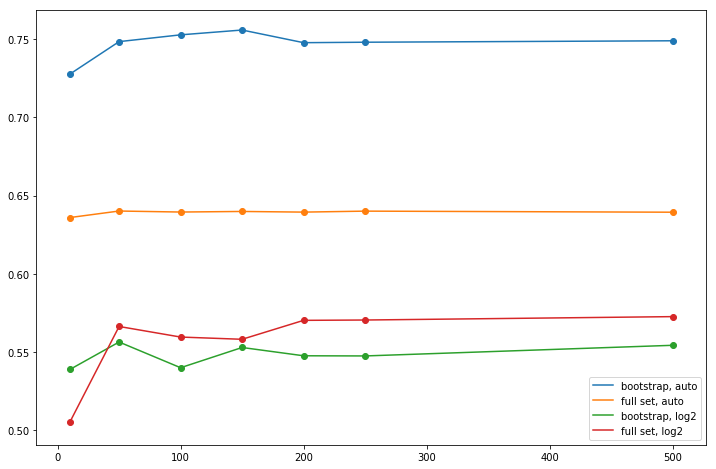

In [94]:
xlib = tree_nums
fig, ax = plt.subplots(figsize=(12,8))


ax.plot(xlib, boot_auto_src)
ax.scatter(xlib, boot_auto_src)
ax.plot(xlib, full_auto_src)
ax.scatter(xlib, full_auto_src)
ax.plot(xlib, boot_log2_src)
ax.scatter(xlib, boot_log2_src)
ax.plot(xlib, full_log2_src)
ax.scatter(xlib, full_log2_src)
ax.legend(['bootstrap, auto', 'full set, auto', 'bootstrap, log2', 'full set, log2'])

plt.show()

In [151]:
for scr_lst in train_RF_out_scr:
    print(max(scr_lst))

[0.7234587459723114, 0.7489975293608062, 0.752441647497295, 0.7524662741063903, 0.7513641694986184, 0.7500685780133036, 0.7524877321810686]
[0.7244394887593681, 0.7443171385460083, 0.7454324773495858, 0.7462595421323873, 0.7475418802524028, 0.7497250213013322, 0.7509573634827984]
[0.7397861464455411, 0.7427596126961027, 0.7489115328606577, 0.7508776001110324, 0.7504651059306308, 0.7496773238775428, 0.750701850134384]
[0.7363693184567439, 0.7447670933998574, 0.7482582105067817, 0.7488084623026088, 0.7505521547298568, 0.7495432998404181, 0.7511153829720346]
[0.7381067857266459, 0.7517982014224158, 0.7522914397591463, 0.7497398368921548, 0.7494185138719749, 0.7488869333485071, 0.7523512371915899]
[0.7405504692311486, 0.7487004821402039, 0.7461934592259725, 0.7523965170023298, 0.7494295175813258, 0.7527718960634504, 0.7521610635993401]
[0.7383426938436467, 0.751284446517639, 0.7473921051450478, 0.7502189075747736, 0.7533153501925346, 0.7509317689763351, 0.7493603443224691]
[0.7363006878727

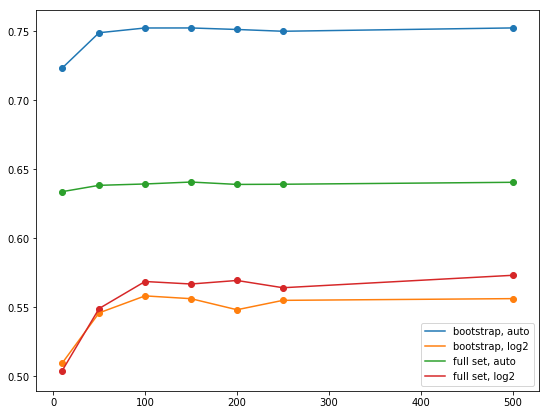

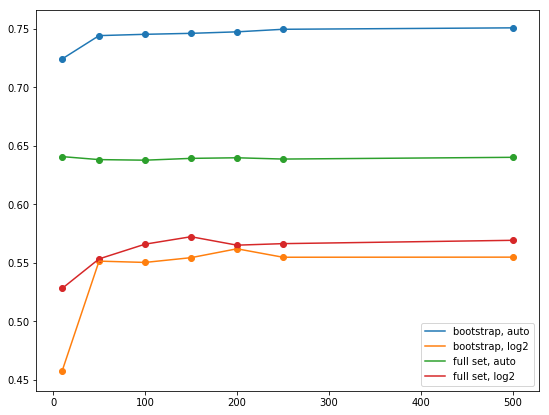

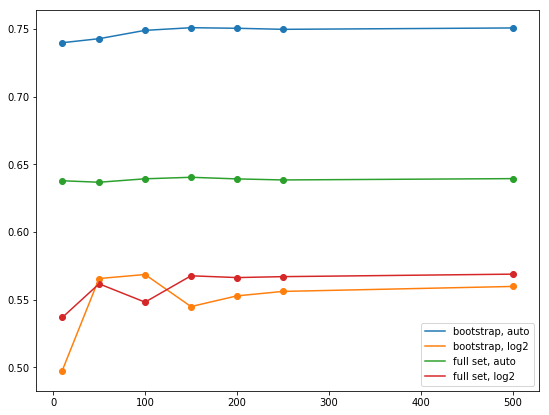

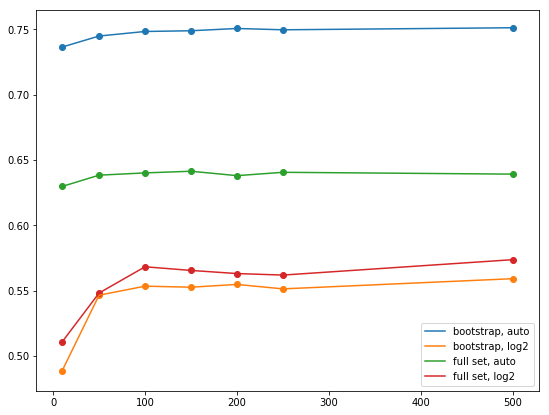

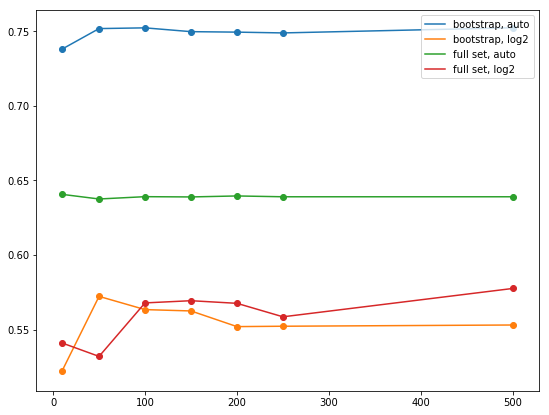

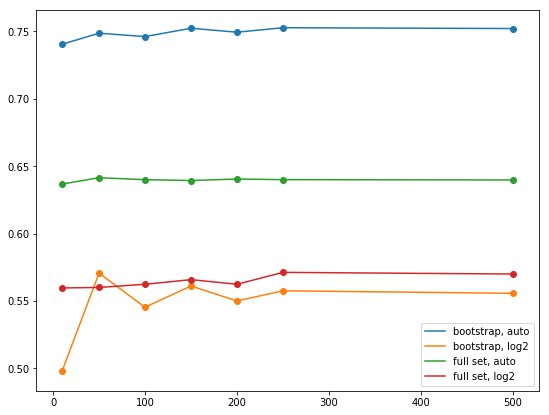

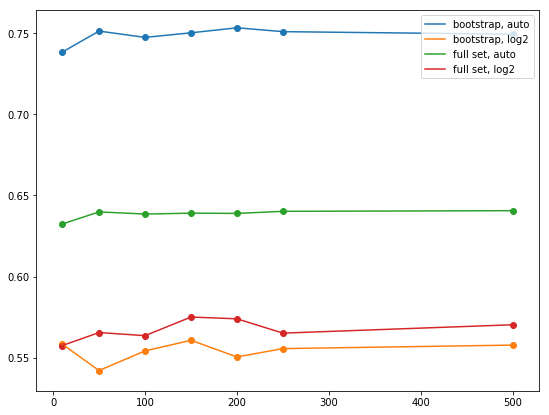

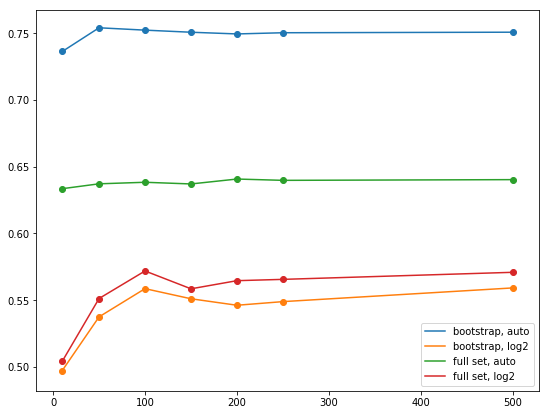

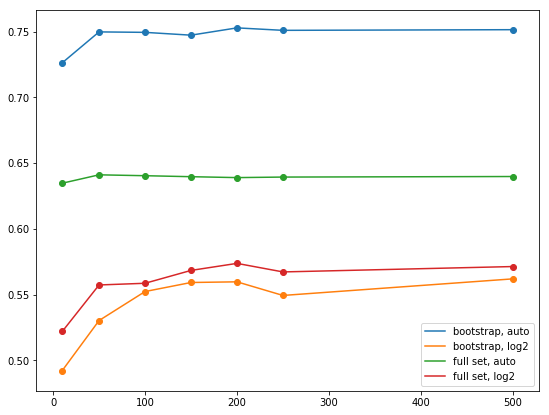

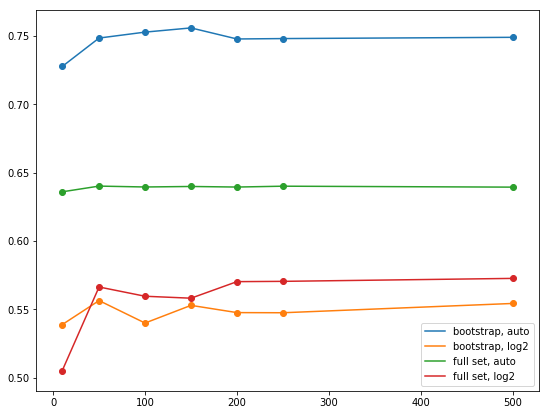

In [97]:
count = 0
for scr_lst in train_RF_out_scr:
    count += 1
    xlib = tree_nums
    fig, ax = plt.subplots(figsize=(9,7))
    for i in range(4):
        ax.plot(xlib, scr_lst[i])
        ax.scatter(xlib, scr_lst[i])
    ax.legend(['bootstrap, auto', 'bootstrap, log2', 'full set, auto', 'full set, log2'])
    plt.show()

using bootstrap all features is much better in R^2

## Get MSE

In [110]:
def MSE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

In [ ]:
data = {'Type.of.Training': []}

In [112]:
tree1 = train_RF_out_reg[0][0][0]

In [107]:
tree1

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
y_new_test = tree1.predict(X_test)

In [109]:
([1, 2, 3] - [3, 2, 1])^2

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [119]:
np.array(y_new_test).sum()

522893397.4035938

In [120]:
np.array(y_test).sum()

531147574.85

In [114]:
MSE(y_new_test, y_test)

11565962445.049429

In [ ]:
for scr_lst in train_RF_out_scr:
    col = 'Iteration.' + str(count) + ".R_sqr"

## Generate feature importance 

In [71]:
imp = list(regressor.feature_importances_)
col = list(X_train.columns)

In [75]:
data = {'Column.Names': col, 'Feature.Importance': imp}
df = pd.DataFrame(data, columns = ['Column.Names','Feature.Importance'])
df

,Column.Names,Feature.Importance
0,APR.Severity.of.Illness.Code,1.591309e-02
1,APR.Risk.of.Mortality,1.252543e-02
2,Age.Ordinal,1.489473e-02
3,Length.of.Stay,5.656567e-01
4,Hospital.County.Bronx,5.024358e-03
5,Hospital.County.Kings,4.662854e-03
6,Hospital.County.Manhattan,4.210911e-02
7,Hospital.County.Queens,3.007749e-03
8,Hospital.County.Richmond,6.723471e-04
9,Type.of.Admission.Elective,1.805517e-02


In [76]:
#df.to_csv('../data/Feature_importance.csv')

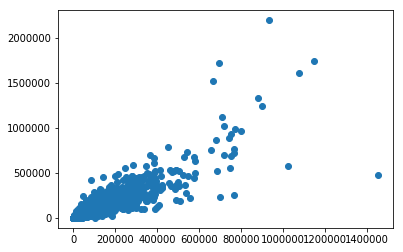

In [65]:
plt.scatter(y_pred, y_test)

In [79]:
df.sort_values(by = 'Feature.Importance', ascending = False)

,Column.Names,Feature.Importance
3,Length.of.Stay,5.656567e-01
282,APR.DRG.Code.4,8.033502e-02
374,APR.Medical.Surgical.Description.Surgical,6.021038e-02
6,Hospital.County.Manhattan,4.210911e-02
9,Type.of.Admission.Elective,1.805517e-02
0,APR.Severity.of.Illness.Code,1.591309e-02
2,Age.Ordinal,1.489473e-02
1,APR.Risk.of.Mortality,1.252543e-02
10,Type.of.Admission.Emergency,7.103173e-03
4,Hospital.County.Bronx,5.024358e-03


In [129]:
feat_imp = list(train_RF_out_reg[0][0][4].feature_importances_)

In [131]:
colnames = list(X.columns)

In [133]:
data_imp = {'columns': colnames, 'importance': feat_imp}

In [134]:
imp_df = pd.DataFrame(data_imp, columns = ['columns', 'importance'])

In [150]:
imp_df.sort_values(by = 'importance', ascending = False).head(10)

,columns,importance
3,Length.of.Stay,0.549700
282,APR.DRG.Code.4,0.124110
374,APR.Medical.Surgical.Description.Surgical,0.045906
6,Hospital.County.Manhattan,0.037793
2,Age.Ordinal,0.014987
9,Type.of.Admission.Elective,0.014565
1,APR.Risk.of.Mortality,0.013860
0,APR.Severity.of.Illness.Code,0.013085
122,CCS.Procedure.Code.50,0.008754
18,Patient.Disposition.Expired,0.007105


In [130]:
train_RF_out_reg[0][0][4].get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

KeyboardInterrupt: 

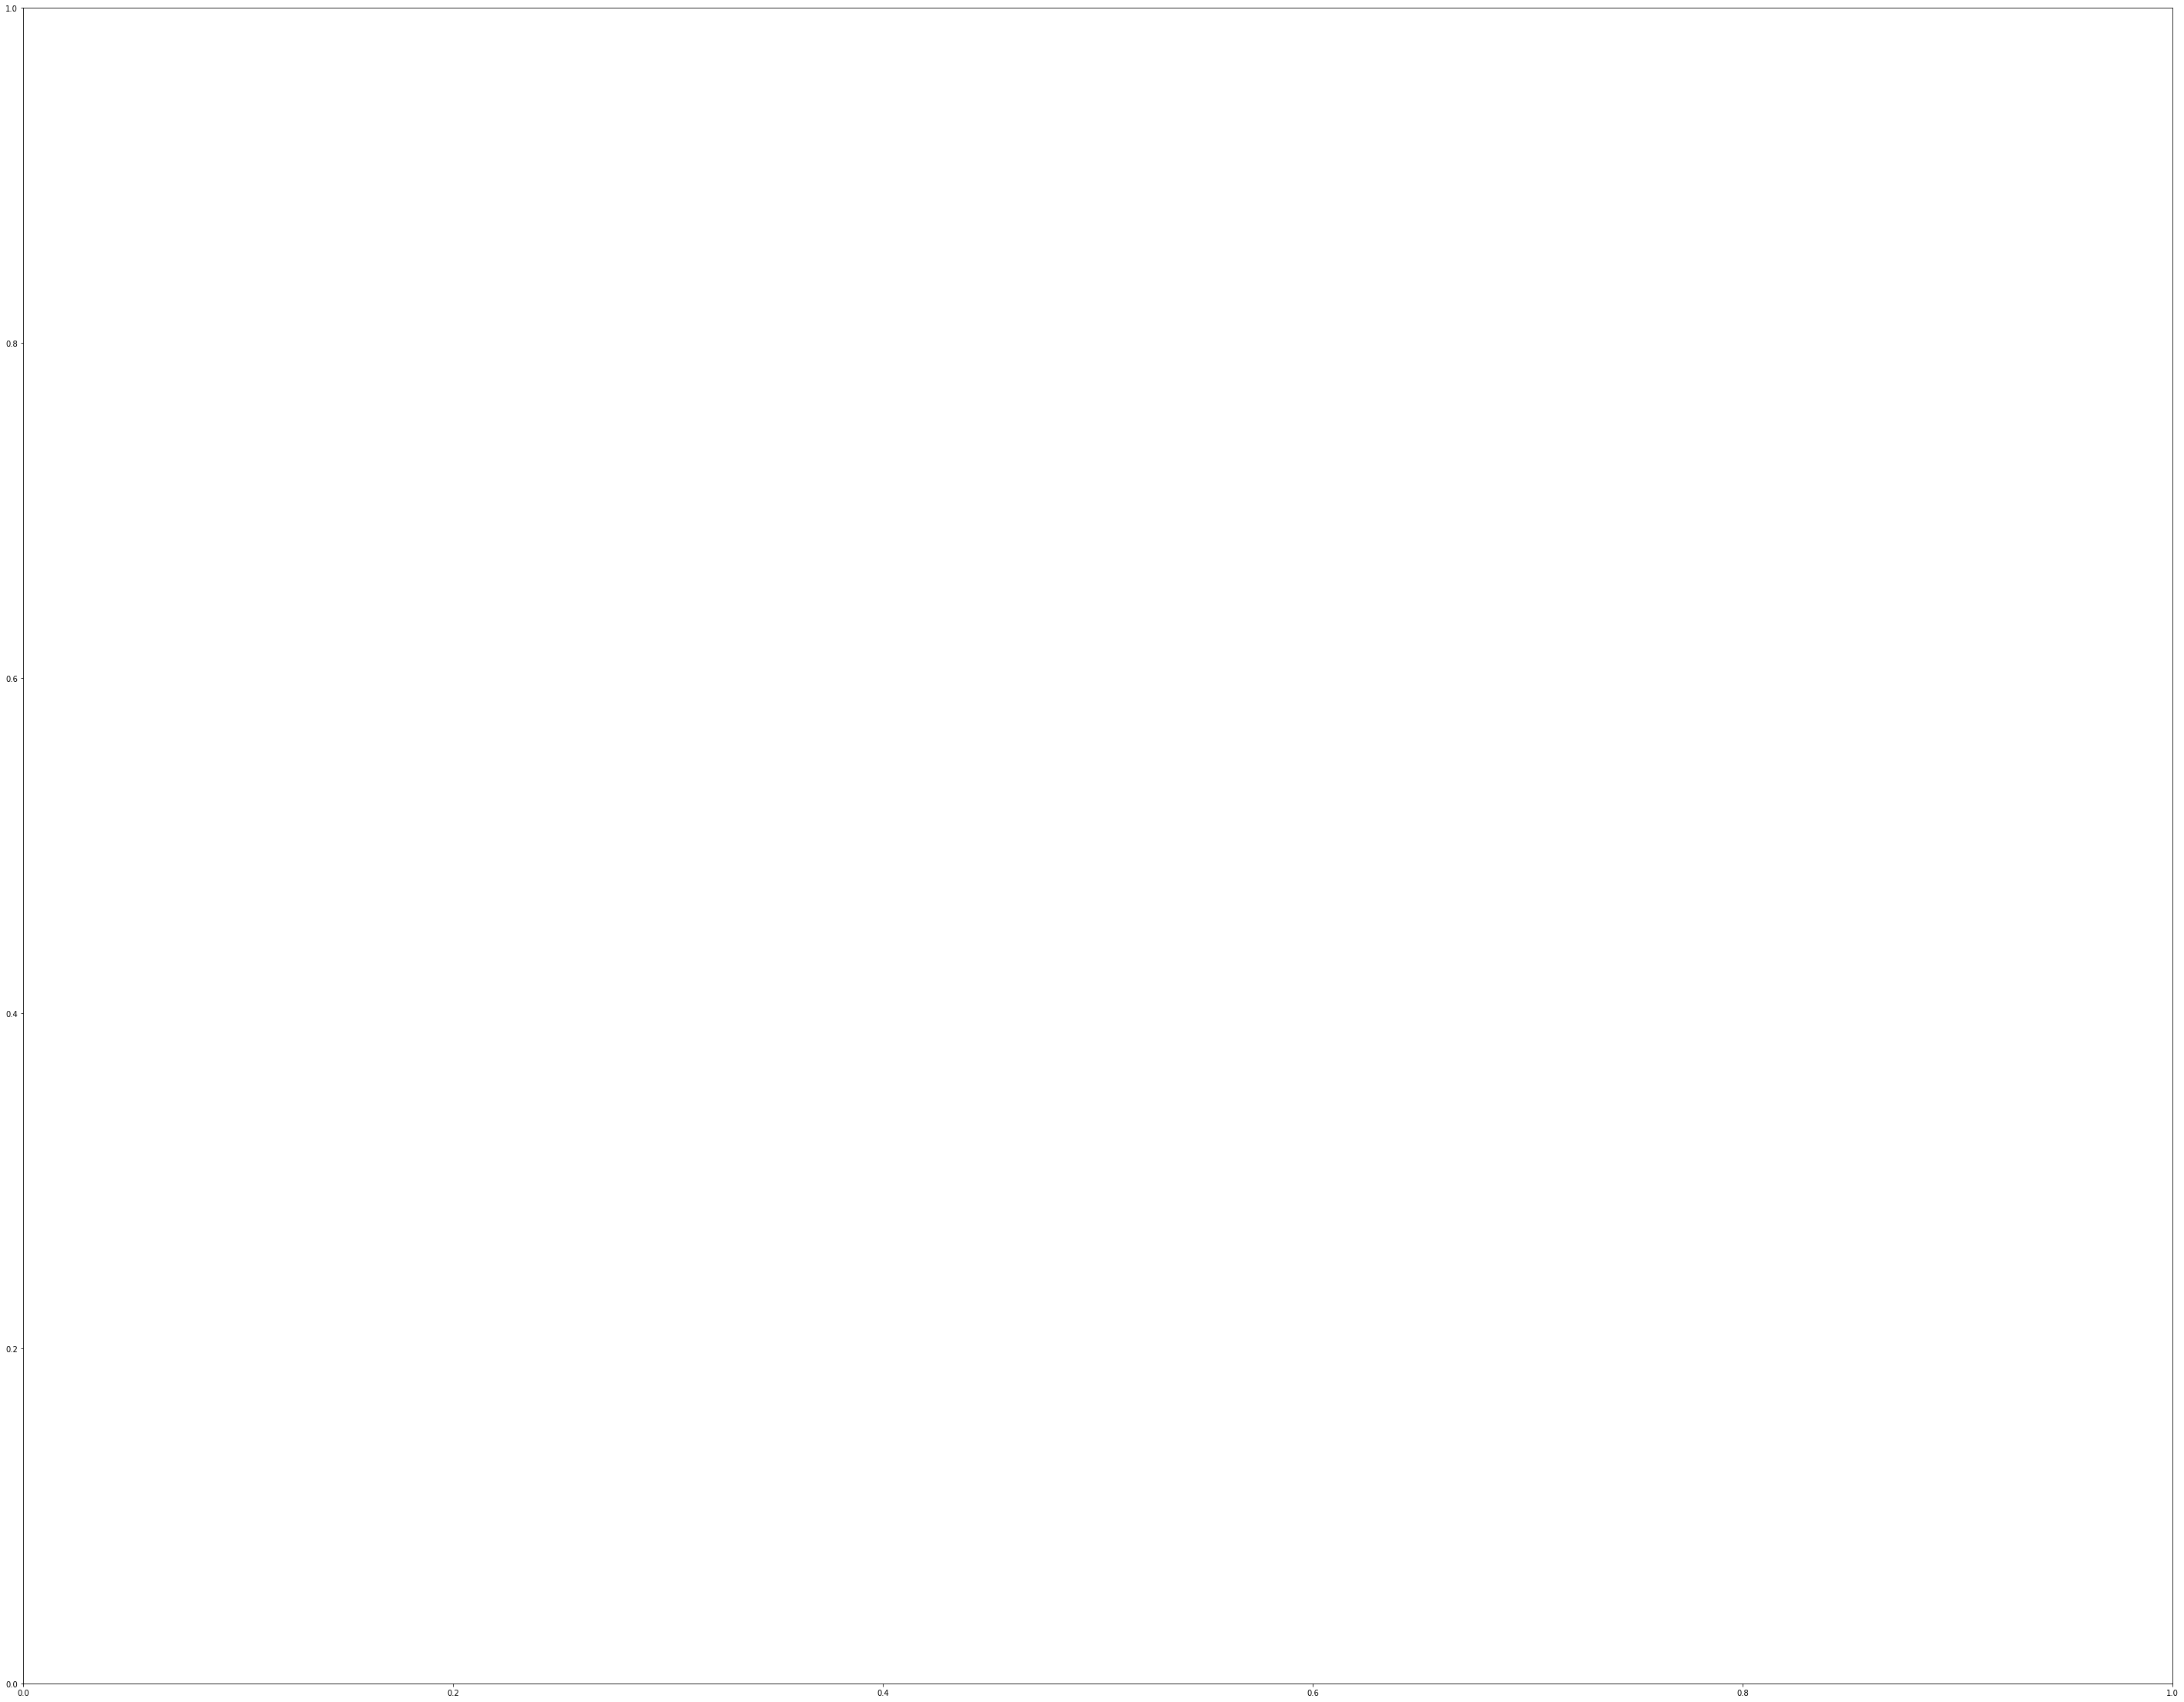

In [145]:
fig1, ax1 = plt.subplots(figsize=(50,40))
ax1.hist(y)

ax1.show()

KeyboardInterrupt: 

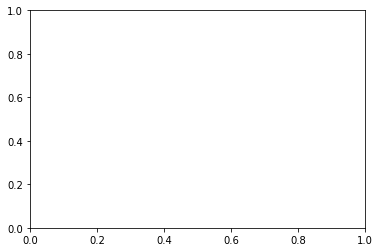

In [144]:
plt.hist(y)

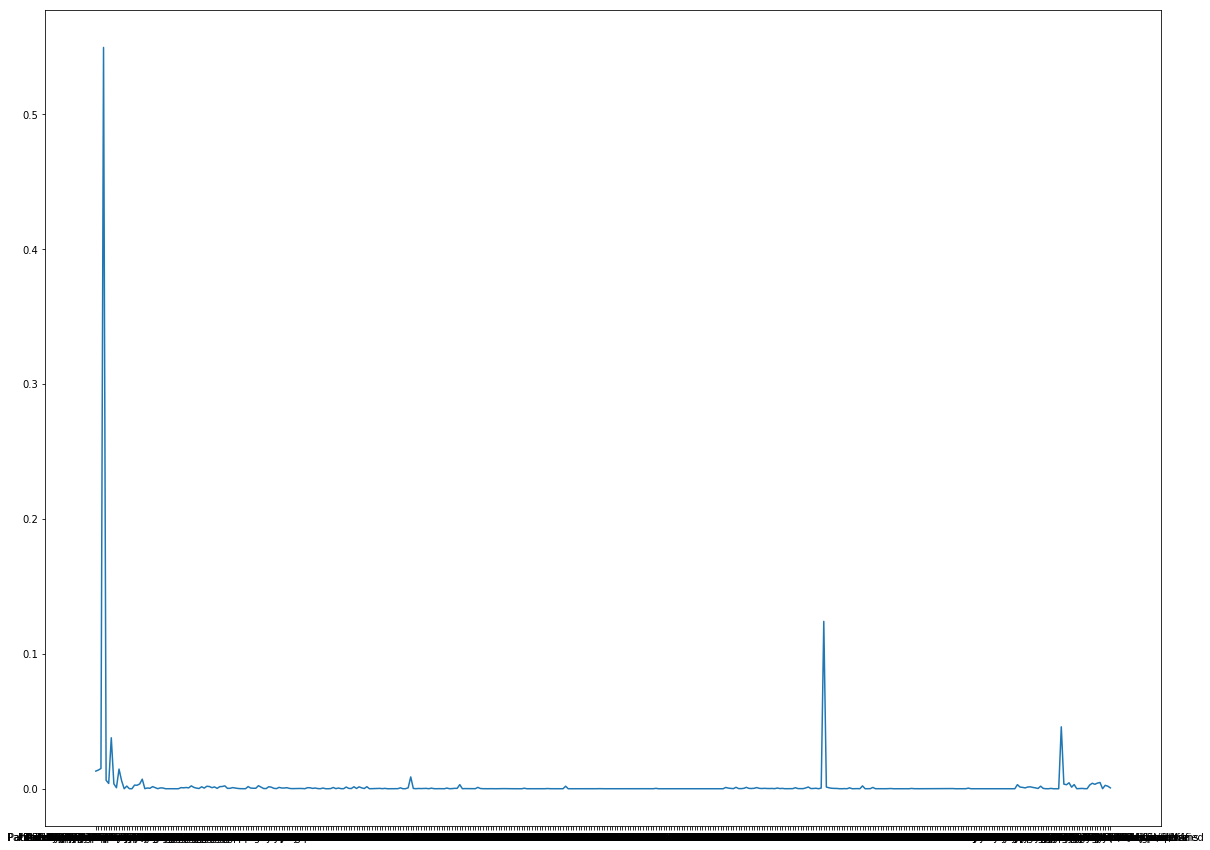

In [148]:
fig1, ax1 = plt.subplots(figsize = (20, 15))

ax1.plot(colnames, feat_imp)

plt.show()